# Adding more pitch class sets
 I will test what happens if we add to the model the possibility of recognizing third intervals(as they are present in our datasets, but have not been considered during all the experiments) to simulate realistic situations with more pitch-class sets

In [1]:
from test_utils.imports import *

### Load data for Thirds model

Basic Guitar dataset data

In [2]:
MC_base_path = '/home/eduard/Escritorio/pysimmusic-experiments/guitar_for_beginners/'
loader = SEGMENTS_LOADER(MC_base_path )

loader.base_path = os.path.join(loader.base_path,'data')
train_segments = loader.load_chromas_annotation_list('annotations/correct.txt',roll_to_c = True,)
train_segments.chromas.shape

loader.base_path = os.path.join(MC_base_path,'one_time_scripts/guitar_samples_annotation/')
audio_paths = "chroma_pattern_dataset.json"

exercise_id2annotations = {
        26: MC_base_path + 'data/exercises/Leah17Dec2018/Lesson01Ex1/l1ex1.json',
        20: MC_base_path + 'data/exercises/Leah17Dec2018/Lesson02Ex1/l2ex1.json',
        17: MC_base_path + 'data/exercises/Leah17Dec2018/Lesson02Ex2/l2ex2.json',
        16: MC_base_path + 'data/exercises/Leah17Dec2018/Lesson03Ex1/l3ex1.json',
        27: MC_base_path + 'data/exercises/Leah17Dec2018/Lesson04Ex1/l4ex1.json',
        25: MC_base_path + 'data/exercises/Leah17Dec2018/Lesson05Ex1/l5ex1.json'
    }

train_segments = loader.load_chromas_for_dataset(exercise_id2annotations,audio_paths,roll_to_c = True,segments = train_segments)

Loaded 6 files.
Loaded 80 files.

--->>>The train segments  loading took 0.02 s to compute.


Five Guitar dataset data
* Put half of the recordings with third intervals in the test set an the other part on the train set

In [3]:
dataset_path = '../Databases/'
loader = SEGMENTS_LOADER(dataset_path)

loader_3rds = 'Loaders/Raw_database_with_third_intervals.json' # Recordings with third intervals
loader_no3rds = 'Loaders/Raw_database_without_third_intervals.json' # Recodings without third intervals

In [4]:
train_audios, test_audios, train_segments, test_segments = loader.train_test_split_json(loader_3rds,
                                                                                 ex_2_id, 
                                                                                 seed_num  =1, 
                                                                                 split=0.5, #half of the recordings
                                                                                 segments= train_segments) #Split recordings with thrid intervals in train/test


Memory(cachedir='../Cached_Segments/joblib')
Building train set ...

--->>>The train segments  loading took 0.04 s to compute.
Building test set ...

--->>>The test segments  loading took 0.01 s to compute.


In [5]:

is_defined = [x != 'unclassified' for x in train_segments.kinds]
train_segments = AnnotatedChromaSegments(
    train_segments.labels[is_defined],
    train_segments.pitches[is_defined],
    train_segments.kinds[is_defined],
    train_segments.chromas[is_defined],
    train_segments.uids[is_defined],
    train_segments.start_times[is_defined],
    train_segments.durations[is_defined])

print('Test set has {} chromas.'.format(train_segments.chromas.shape[0]))

for k in ['maj','min','1','5','+3','-3']:
    print('{} -> Num chromas: {}'.format(k,len(train_segments.chromas[train_segments.kinds == k])))

Test set has 3449 chromas.
maj -> Num chromas: 425
min -> Num chromas: 328
1 -> Num chromas: 1944
5 -> Num chromas: 192
+3 -> Num chromas: 252
-3 -> Num chromas: 308


### Train Thirds model

In [6]:
model_name = 'Baseline_Case_Thirds'
model_path = '../MODELS/cross-validation/Baseline_Case_Thirds/'

m = NewModel(
        {'maj': ['I', 'III', 'V'], 'min': ['I', 'IIIb', 'V'], '5': ['I', 'V'], '1': ['I', 'V', 'III'],
         '+3': ['I', 'III'], '-3': ['I','IIIb']},

        {'maj': {'n_components': 1, 'covariance_type': 'full', 'max_iter': 200},
         'min': {'n_components': 1, 'covariance_type': 'full', 'max_iter': 200},
         '5': {'n_components': 1, 'covariance_type': 'full', 'max_iter': 200},
         '1': {'n_components': 1, 'covariance_type': 'full', 'max_iter': 200},
         '+3': {'n_components': 1, 'covariance_type': 'full', 'max_iter': 200},
         '-3': {'n_components': 1, 'covariance_type': 'full', 'max_iter': 200}})

m.fit(train_segments)
# m.save_model(model_path  + model_name + '.pkl')

Now training:  maj
Now training:  min
Now training:  5
Now training:  1
Now training:  +3
Now training:  -3


#### Visualize model

0


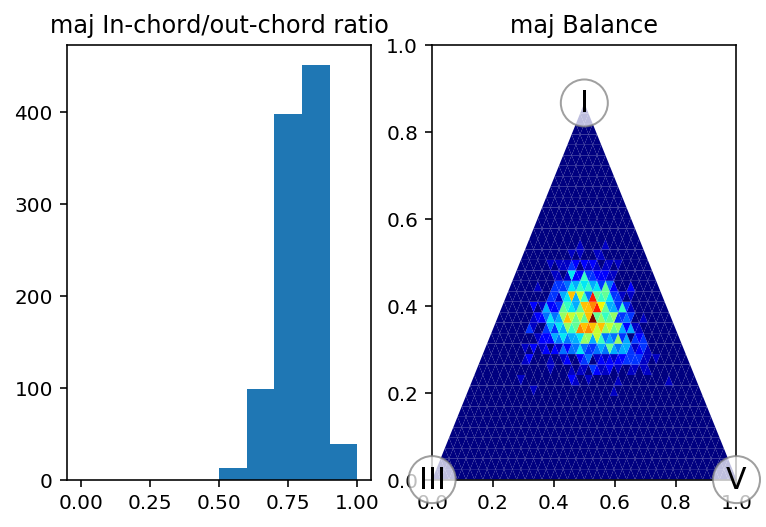

1


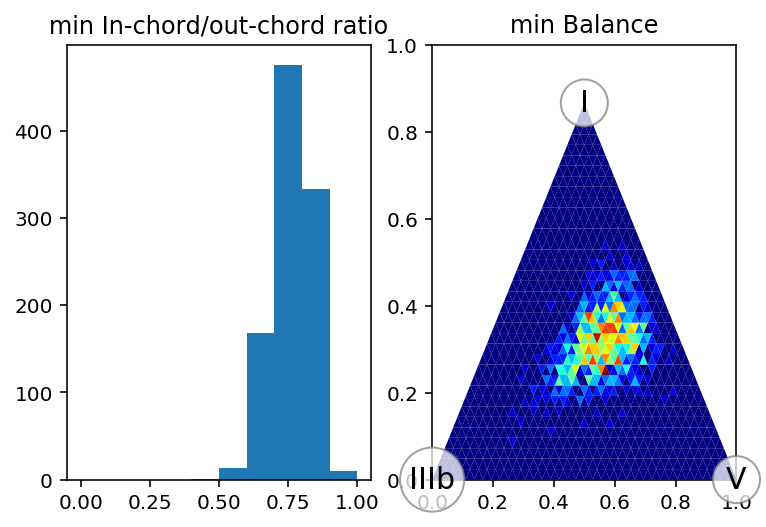

2


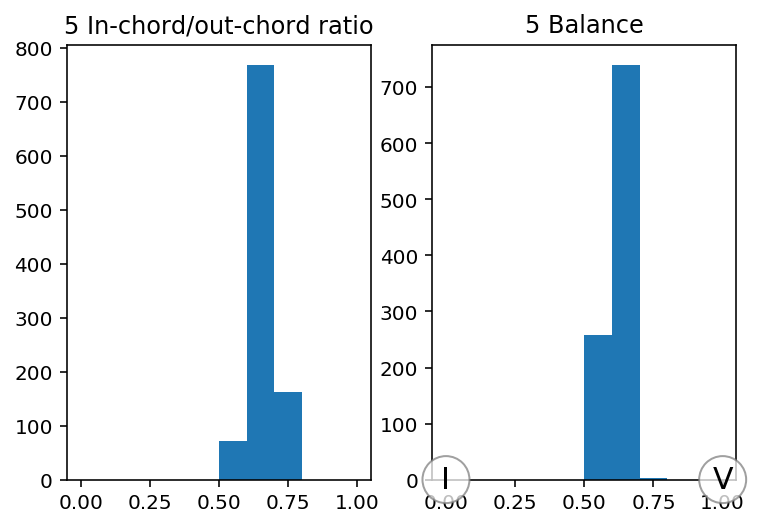

3


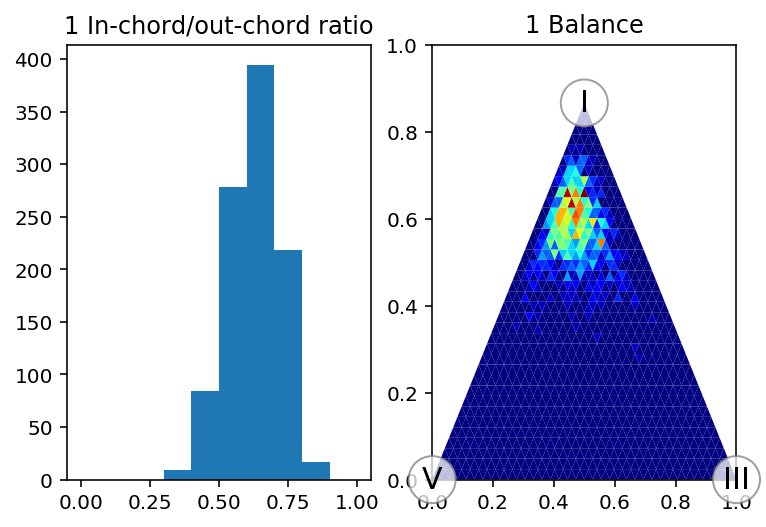

4


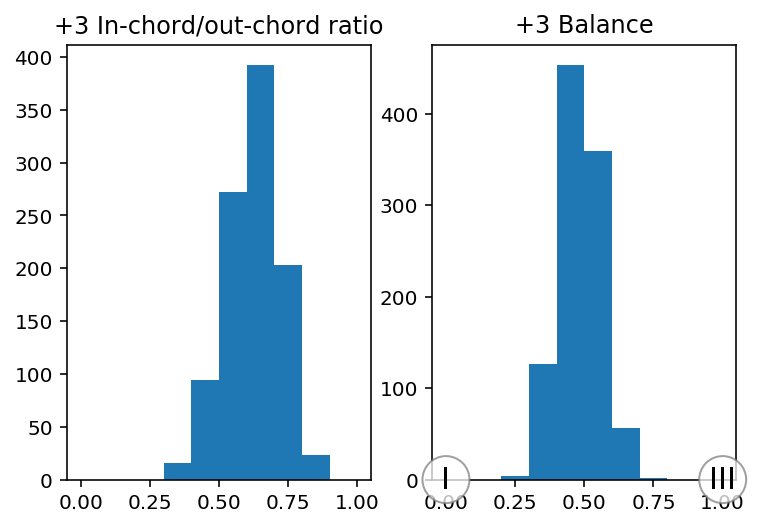

5


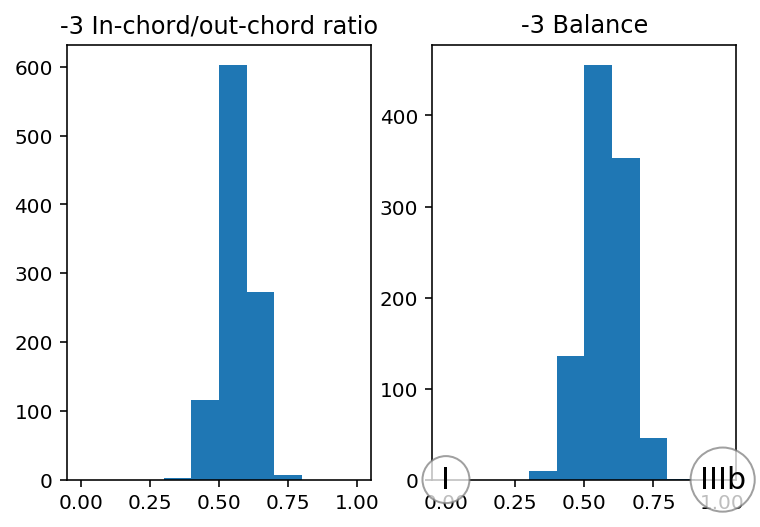

In [7]:
m = joblib.load(model_path + model_name + '.pkl')
for k in range(len(m.kinds)):
    print(k)
    visualize(m, k)

### Load test set

* Load the test set for which we would evaluate the Baseline model and the Tirds Model

In [8]:
test_segments = loader.load_chromas_for_dataset(ex_2_id,loader_no3rds, roll_to_c = False, segments = test_segments)

Loaded 75 files.

--->>>The train segments  loading took 0.24 s to compute.


In [9]:
is_defined = [x != 'unclassified' for x in test_segments.kinds]
test_segments = AnnotatedChromaSegments(
    test_segments.labels[is_defined],
    test_segments.pitches[is_defined],
    test_segments.kinds[is_defined],
    test_segments.chromas[is_defined],
    test_segments.uids[is_defined],
    test_segments.start_times[is_defined],
    test_segments.durations[is_defined])

print('Test set has {} chromas.'.format(test_segments.chromas.shape[0]))

for k in ['maj','min','1','5','+3','-3']:
    print('{} -> Num chromas: {}'.format(k,len(test_segments.chromas[test_segments.kinds == k])))

Test set has 8484 chromas.
maj -> Num chromas: 1276
min -> Num chromas: 1059
1 -> Num chromas: 4729
5 -> Num chromas: 780
+3 -> Num chromas: 288
-3 -> Num chromas: 352


# Evaluation

#### Baselinde model

In [10]:
model_name = 'Baseline_Case'
model_path = '../MODELS/cross-validation/Baseline_Case/'

In [11]:
m = joblib.load(model_path + model_name + '.pkl')

pred = m.predict(test_segments.chromas)
pred = [str(p) for p in pred[0]]

test_segments.labels = [x.replace('(','') for x in test_segments.labels]
test_segments.labels = [x.replace(')','') for x in test_segments.labels]

for i,p in enumerate(test_segments.labels):
    if '1,3' in p:
        test_segments.labels[i] = test_segments.labels[i].replace('1,3','+3')
    elif '1,b3' in p:
        test_segments.labels[i] = test_segments.labels[i].replace('1,b3','-3')
    else:
        pass
    
    if 'maj' in test_segments.kinds[i]:
        if ':maj' not in test_segments.labels[i]:
            test_segments.labels[i] = test_segments.labels[i]+':maj'

Accuracy: 0.7909


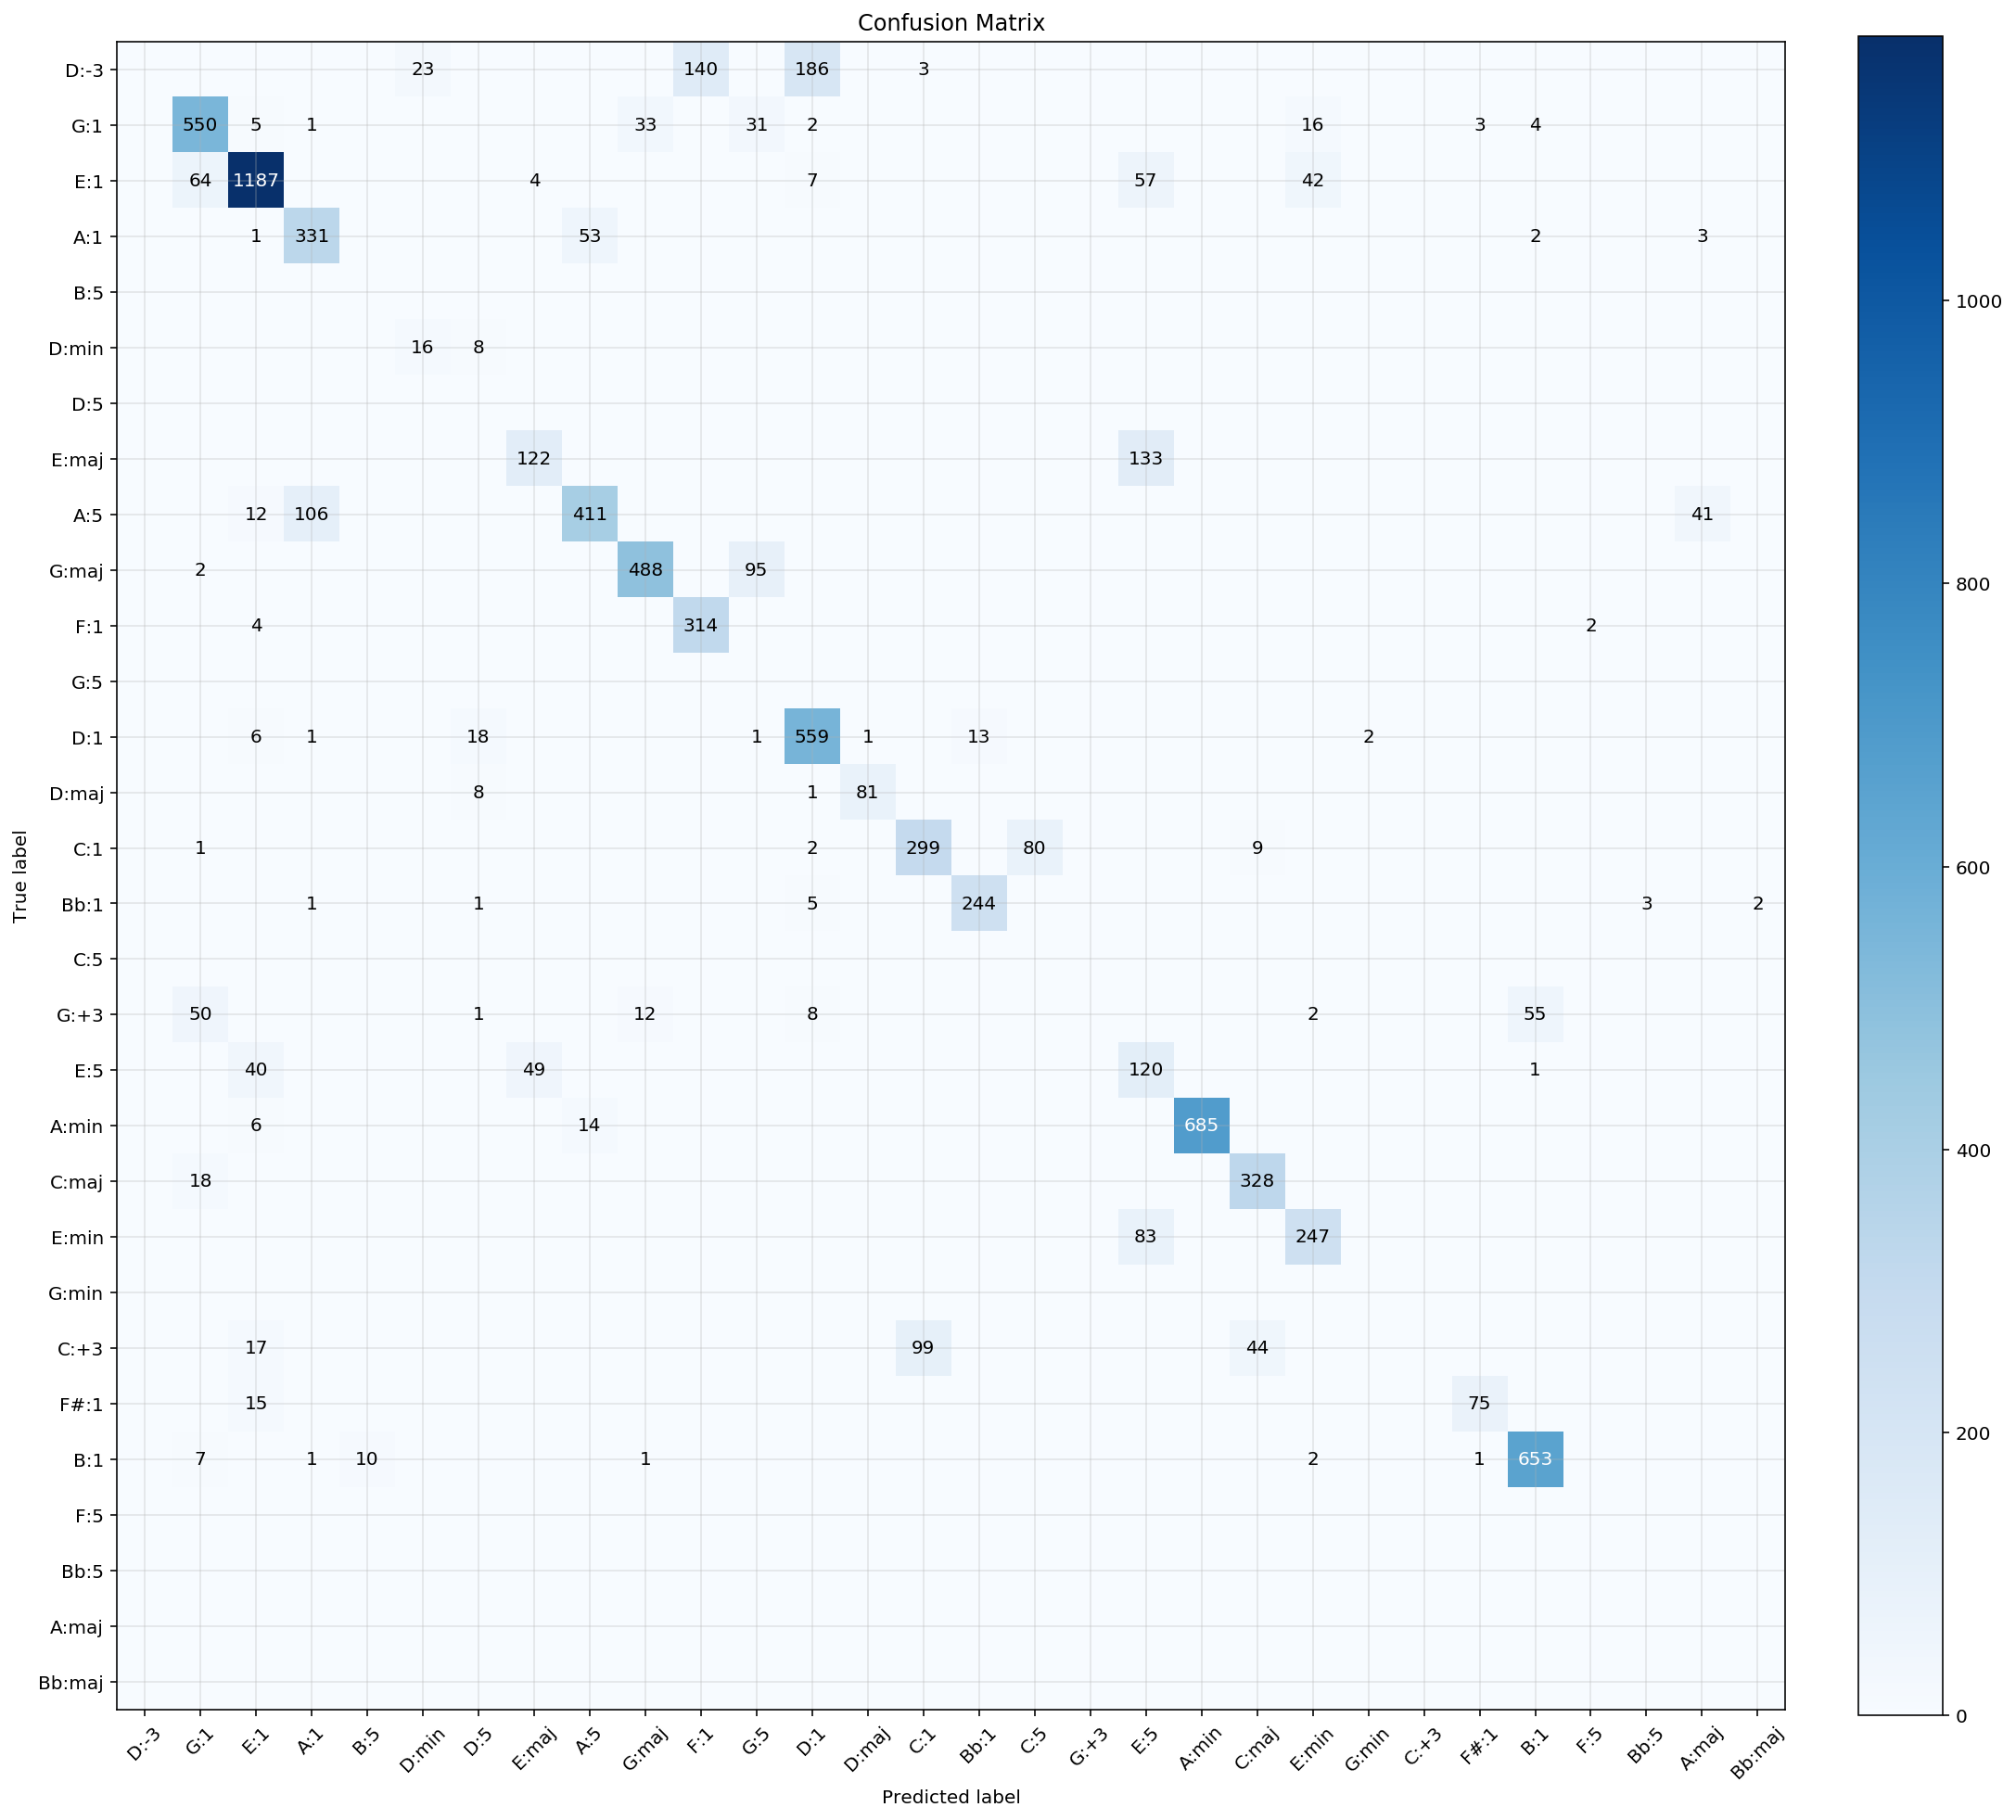

In [12]:
# pitch class set metrics
OM = Overall_Metrics(test_segments.labels , pred)
OM.accuracy()
cm  =OM.conf_matrix()

Accuracy: 0.8081


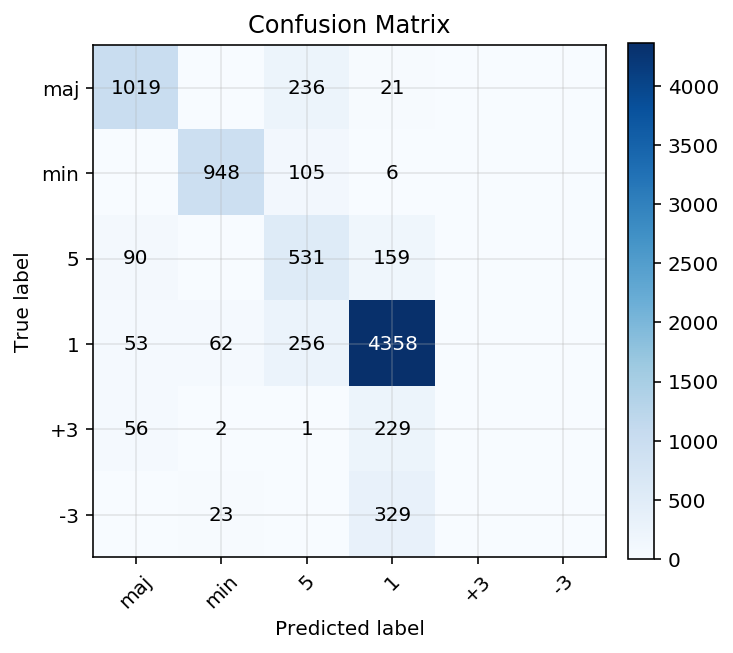

In [13]:
KM = Kind_Metrics(test_segments.kinds,pred, labels = ['maj','min','5','1','+3','-3'])
KM.accuracy()
cm = KM.conf_matrix()

#### Thirds model

In [14]:
model_name = 'Baseline_Case_Thirds'
model_path = '../MODELS/cross-validation/Baseline_Case_Thirds/'

In [15]:
m = joblib.load(model_path + model_name + '.pkl')

pred = m.predict(test_segments.chromas)
pred = [str(p) for p in pred[0]]

test_segments.labels = [x.replace('(','') for x in test_segments.labels]
test_segments.labels = [x.replace(')','') for x in test_segments.labels]

for i,p in enumerate(test_segments.labels):
    if '1,3' in p:
        test_segments.labels[i] = test_segments.labels[i].replace('1,3','+3')
    elif '1,b3' in p:
        test_segments.labels[i] = test_segments.labels[i].replace('1,b3','-3')
    else:
        pass
    
    if 'maj' in test_segments.kinds[i]:
        if ':maj' not in test_segments.labels[i]:
            test_segments.labels[i] = test_segments.labels[i]+':maj'

Accuracy: 0.7373


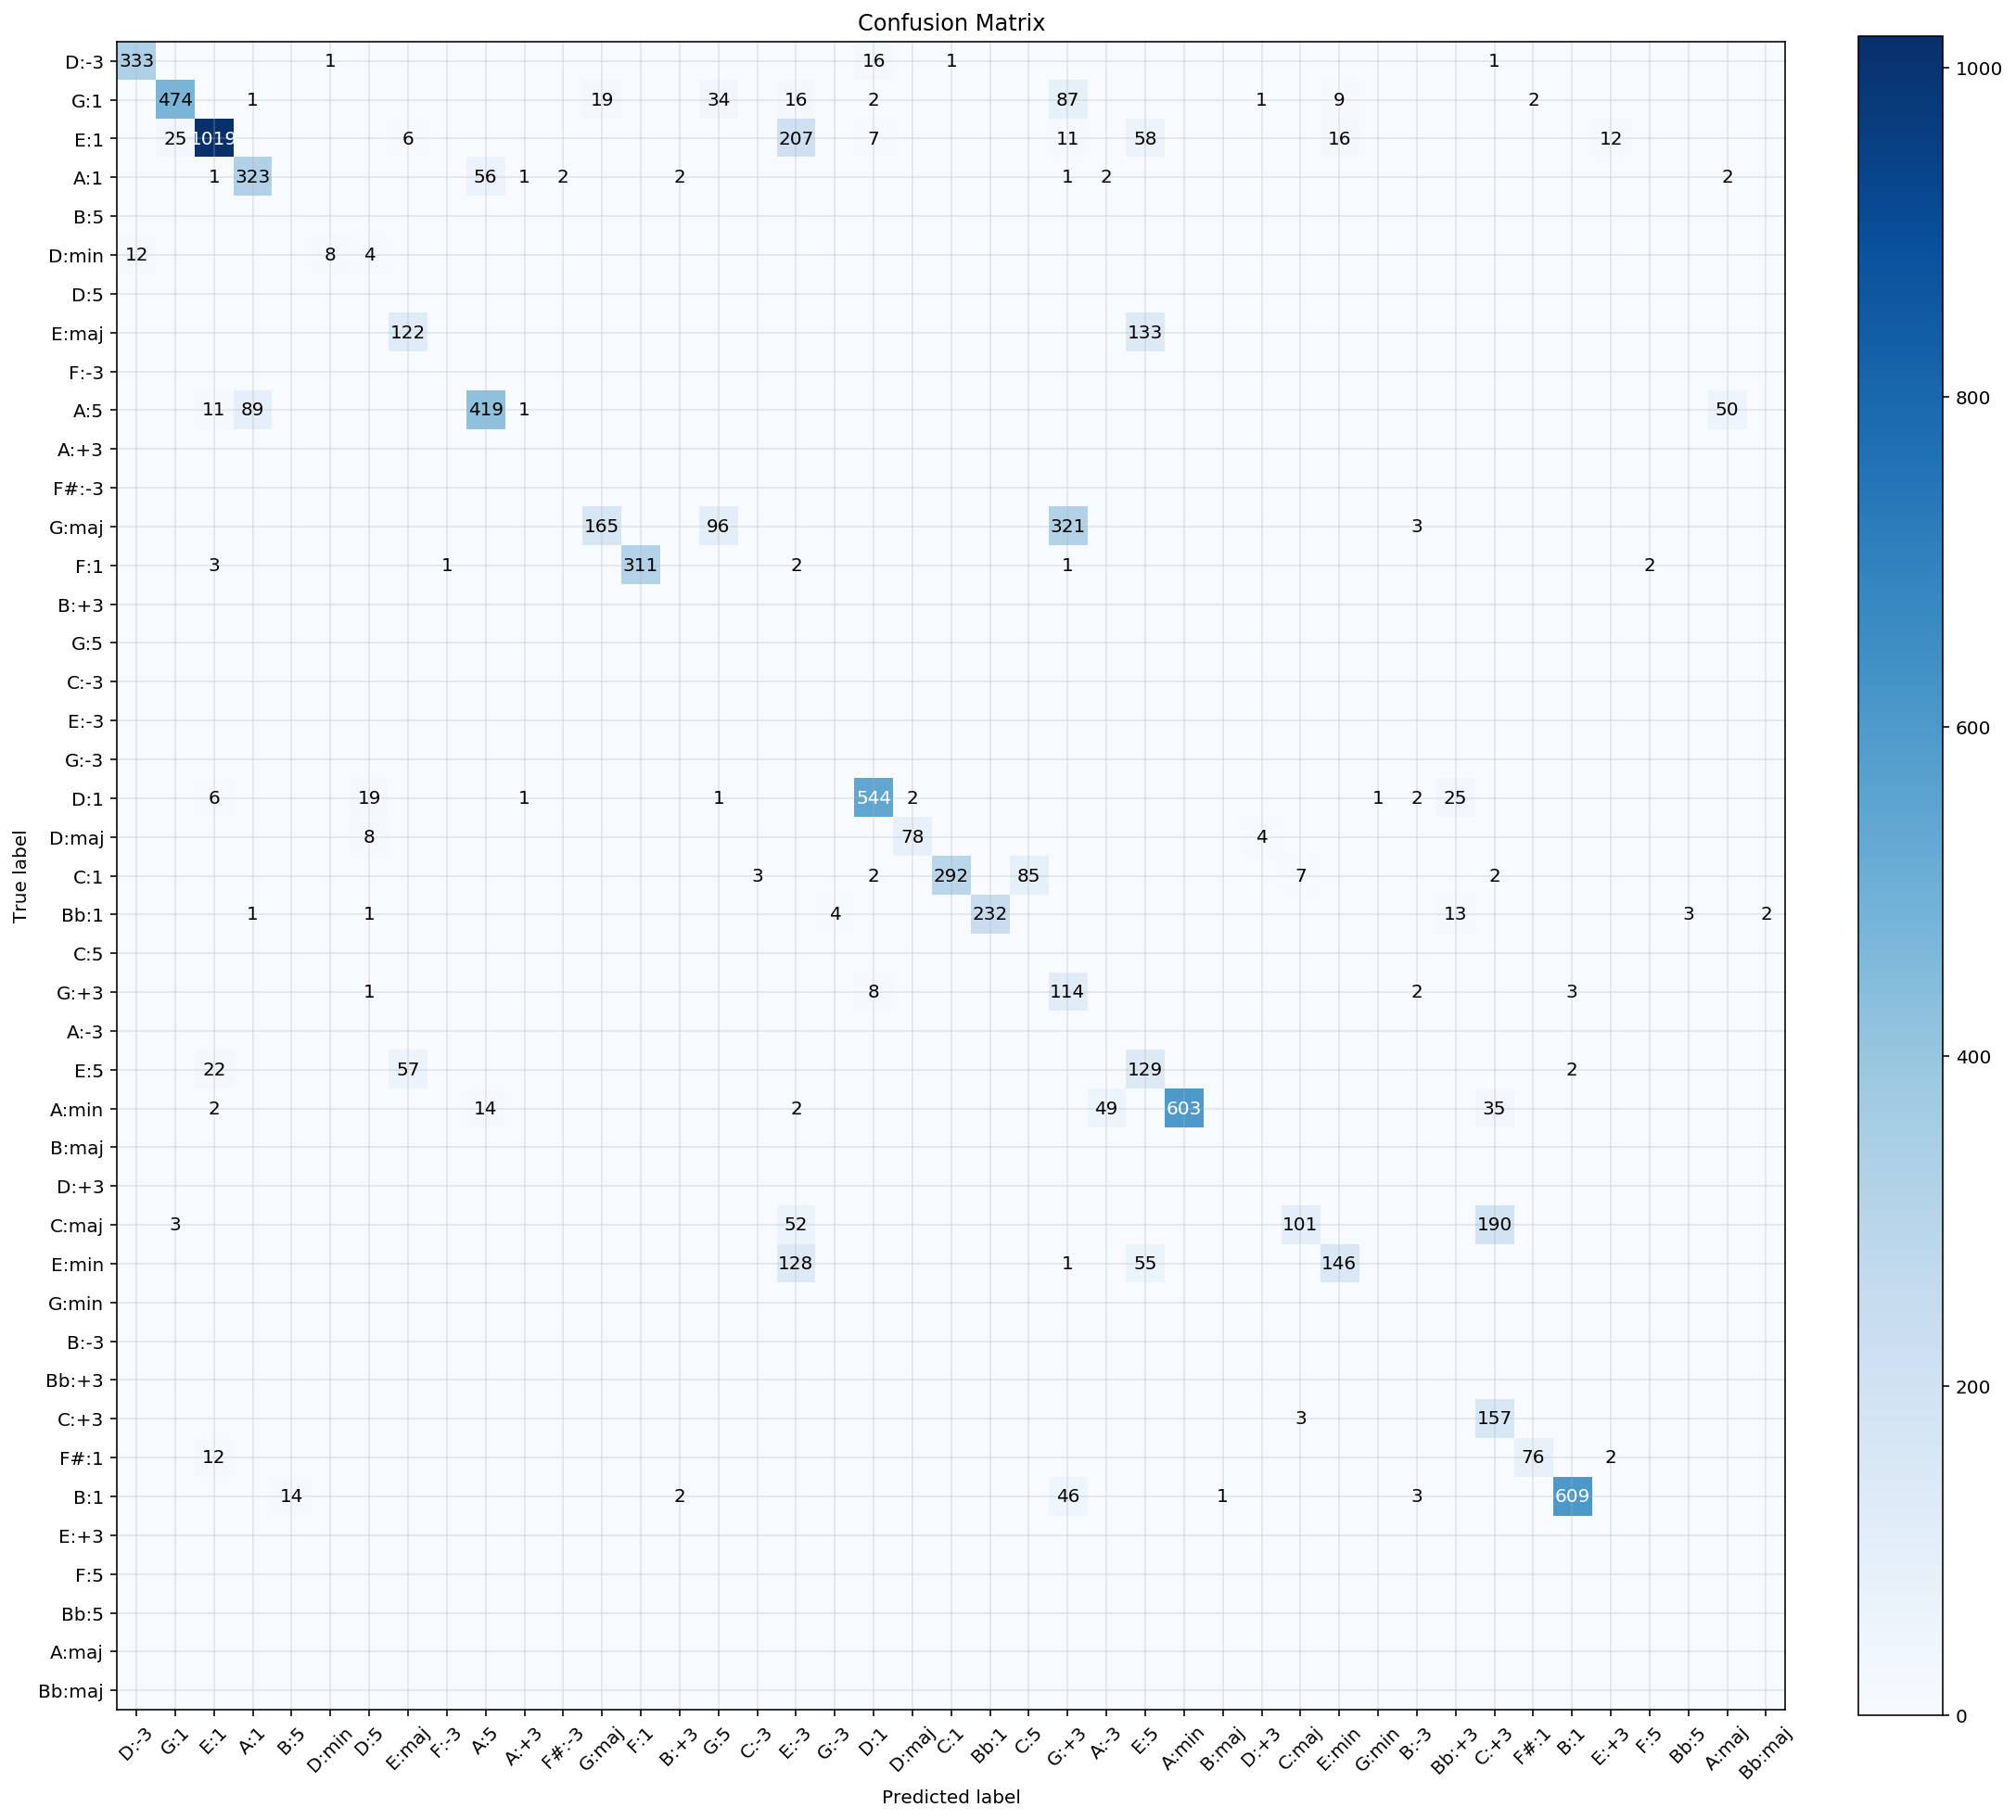

In [16]:
# pitch class set metrics
OM = Overall_Metrics(test_segments.labels , pred)
OM.accuracy()
cm  =OM.conf_matrix()

Accuracy: 0.7446


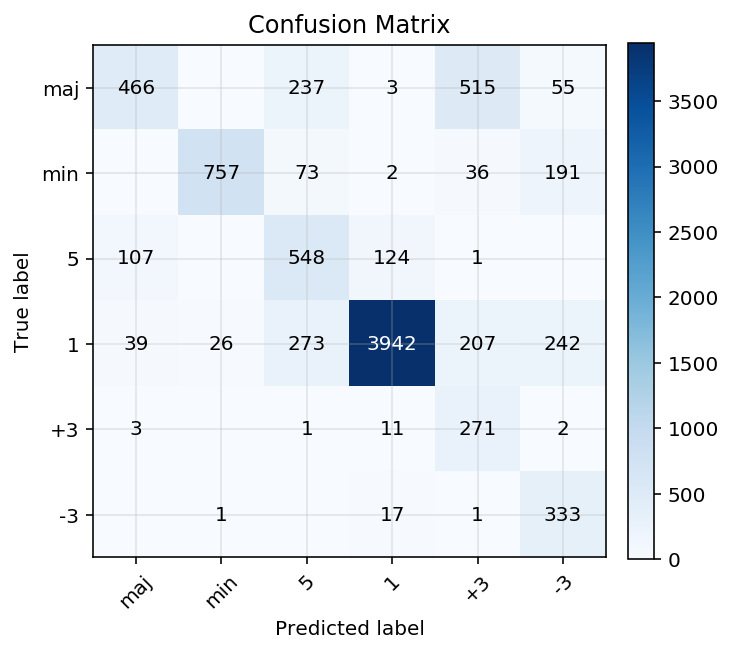

In [17]:
KM = Kind_Metrics(test_segments.kinds,pred, labels = ['maj','min','5','1','+3','-3'])
KM.accuracy()
cm = KM.conf_matrix()